####  malls  
- file reading

In [1]:
import pandas as pd
import  numpy as  np
import seaborn as  sns
import  matplotlib.pyplot as  plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df  =  pd.read_csv(r"C:\Users\admin\Downloads\Mall_Customers.csv")

### Basic  data quality checks

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

### take age  , spending score and  annual  income  as  data

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
x =  df[['Age', 'Annual Income (k$)',
'Spending Score (1-100)']]

In [10]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [12]:
## rename column name
x.columns = ['Age' , 'Annual Income' , 'Spending Score']

In [13]:
x.head(1)

,Age,Annual Income,Spending Score
0,19,15,39


In [17]:
x.columns


Index(['Age', 'Annual Income', 'Spending Score'], dtype='object')

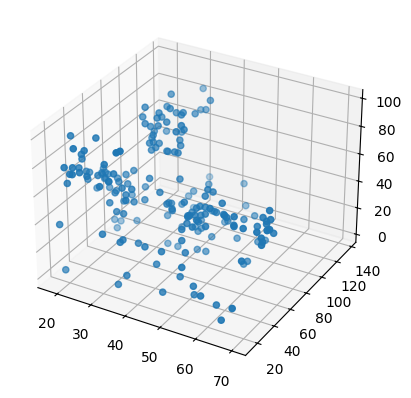

In [18]:
## 
ax = plt.axes(projection = '3d')
x1  =  x['Age']
y1  =  (x['Annual Income'])
z1  =  (x['Spending Score'])
ax.scatter(x1  ,  y1  , z1)

In [19]:
### create  pipeline 
from  sklearn.pipeline  import Pipeline
from  sklearn.impute  import SimpleImputer
from sklearn.preprocessing  import StandardScaler

In [21]:
num_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean'))  , 
('scaler' , StandardScaler())])

In [22]:
x_scaled  =  num_pipeline.fit_transform(x)

In [23]:
x_scaled  =  pd.DataFrame(x_scaled  , columns  =  x.columns)

In [24]:
x_scaled.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [25]:
##  model  fitting

In [84]:
from  sklearn.cluster  import AgglomerativeClustering
agg =  AgglomerativeClustering(n_clusters  = 6)

In [85]:
agg.fit(x_scaled)

,n_clusters,6
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [86]:
lables =  agg.labels_

In [87]:
lables

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [99]:
from sklearn.metrics  import silhouette_score  , silhouette_samples
sil  =  silhouette_score(x_scaled ,  lables)

In [100]:
sil

0.583573039677007

In [101]:
sil_sample  =  silhouette_samples(x_scaled ,  lables)

In [102]:
sil_sample

array([-0.07115618,  0.77501928,  0.3255407 ,  0.78164142,  0.22079578,
        0.78156967,  0.56579803,  0.75864063,  0.47495661,  0.70354976,
        0.46153738,  0.64906499,  0.57104878,  0.80129273,  0.60061754,
        0.80432732,  0.4199314 ,  0.69847143,  0.6062218 ,  0.6580778 ,
        0.42497202,  0.78267108,  0.59105457,  0.70818896,  0.58415681,
        0.77445244,  0.58823913,  0.30857836,  0.55679777,  0.80115859,
        0.47404627,  0.77089898,  0.51320239,  0.74648079,  0.58170295,
        0.78835173,  0.57896465,  0.70016636,  0.51064681,  0.74139266,
        0.59501994,  0.74513602,  0.48910657,  0.48166759,  0.51744209,
        0.6437325 ,  0.52891746,  0.58269636,  0.54931359,  0.51606568,
        0.52850552,  0.46422936,  0.54195216,  0.63900549,  0.56057322,
        0.45918994,  0.59442047,  0.64296073,  0.62405367,  0.63835657,
        0.63561339,  0.62646573,  0.67123453,  0.62421343,  0.69586392,
        0.60177718,  0.10559876,  0.66758339,  0.6120318 ,  0.55

In [103]:
len(sil_sample)

200

In [94]:
x_scaled['Lables'] =  lables

In [95]:
colors  =  []
for  i in lables:
    if i==0:
        colors.append('red')
    elif i==1:
         colors.append('green')
    elif i==2:
         colors.append('blue')
    elif i==3:
         colors.append('pink')
    elif i==4:
         colors.append('orange')
    elif i==5:
         colors.append('black')
        


In [96]:
colors

['orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'red',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'orange',
 'black',
 'green',
 'black',
 'orange',
 'red',
 'orange',
 'black',
 'green',
 'red',
 'red',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'green',
 'green',
 'red',
 'red',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'red',
 'green',
 'green',
 'red',
 'green',
 'red',
 'red',
 'red',
 'green',
 'red',
 'green',
 'red',
 'red',
 'green',
 'green',
 're

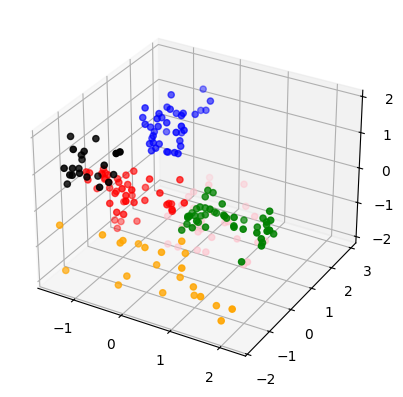

In [98]:
## 
ax = plt.axes(projection = '3d')
x1  =  x_scaled['Age']
y1  =  x_scaled['Annual Income']
z1  =  x_scaled['Spending Score']
ax.scatter(x1  ,  y1  , z1 ,  c  = colors)

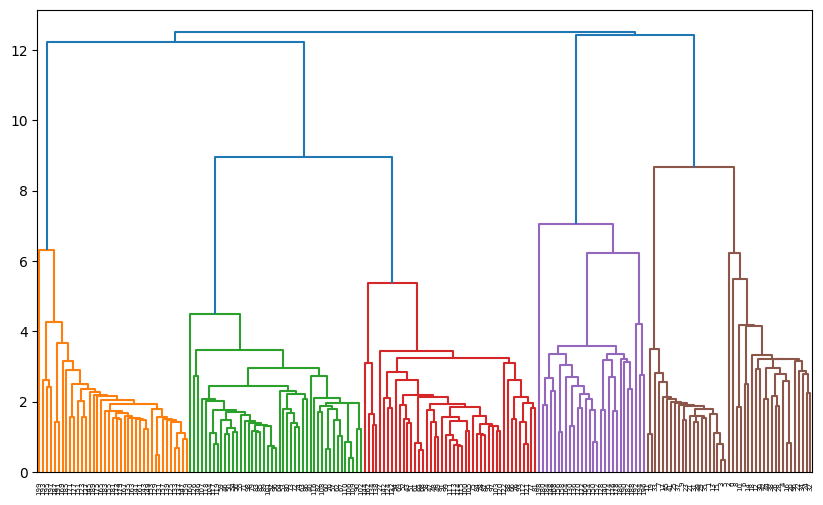

In [108]:
from scipy.spatial  import distance_matrix
from  scipy.cluster.hierarchy import linkage  ,  dendrogram
DM  =  distance_matrix(x_scaled  , x_scaled)
ln  =   linkage(DM)
plt.figure(figsize  =  (10  , 6))
dendrogram(ln)
plt.show()
